In this notebook the number of turns is calculated with different methods. The mistakes are also evaluated.

In [2]:
%matplotlib notebook
import pandas as pd
import numpy as np
import math
import statistics
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, normalize
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib
import warnings
from scipy.signal import savgol_filter, find_peaks, correlate
from sklearn.decomposition import PCA
import scipy.fftpack as FFT
from sklearn.utils import shuffle
import joblib
warnings.filterwarnings('ignore')
matplotlib.rcParams['figure.figsize'] = [10,5]

In [3]:
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

def convert_to_datetime(x):
    dt = datetime.fromtimestamp(x // 1000000000)
    s = dt.strftime('%Y-%m-%d %H:%M:%S')
    s += '.' + str(int(x % 1000000000)).zfill(9)
    return s

def heatmap(cm, labels):
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

    plt.show()
    
def preprocess(data, activity, drop_interval_begin = 3, drop_interval_end = 3):
    #convert nanoseconds to date 
    data['time'] = data['time'].apply(convert_to_datetime) 
    data['time'] = pd.to_datetime(data['time'])

#convert to same data type
    for i in range(1, 4): 
        data[column_names_org[i]] = data[column_names_org[i]].apply(convert_to_float)
    
#drop rows with NaN values 
    data.dropna(axis=0, how='any', inplace=True) #TODO: invullen met mean, mod of median / interpolatie

#drop duplicates 
    data.drop_duplicates(subset=None, keep='first', inplace = True)
    
    #drop first and last 3 sec
    indexFirst = data[ (data['time'].iloc[0]+ pd.to_timedelta(drop_interval_begin, unit='s')) > data['time'] ].index
    data.drop(indexFirst , inplace=True)
    indexLast = data[ (data['time'].iloc[-1]- pd.to_timedelta(drop_interval_end, unit='s')) < data['time'] ].index
    data.drop(indexLast , inplace=True)
    
    #add activity label
    data['activity'] = activity
    
    return data

column_names_org = ['time', 'x', 'y', 'z']

In [4]:
jump_slow1 = pd.read_csv(r"..\data\jump_slow\proefpersoon1\jump_slow_left_forward_tim1.csv", sep=';', header=0, skipinitialspace=True)

jump_slow1 = preprocess(jump_slow1, "jump_slow",15,15)

In [5]:
jump_fast = pd.read_csv(r"..\data\jump_fast\proefpersoon2\jump_fast.csv", sep=';', header=0, skipinitialspace=True)
jump_fast2 = pd.read_csv(r"..\data\jump_fast\proefpersoon2\jump_fast (meting2).csv", sep=';', header=0, skipinitialspace=True)
jump_fast_right = pd.read_csv(r"..\data\jump_fast\proefpersoon1\jump_fast_tim(meting2).csv", sep=';', header=0, skipinitialspace=True)
jump_fast_left_backwards1 = pd.read_csv(r"..\data\jump_fast\proefpersoon2\jump_fast_backwards.csv", sep=';', header=0, skipinitialspace=True)

jump_fast = preprocess(jump_fast, "jump_fast")
jump_fast2 = preprocess(jump_fast2, "jump_fast")
jump_fast_right = preprocess(jump_fast_right, "jump_fast")
jump_fast_left_backwards1 = preprocess(jump_fast_left_backwards1, "jump_fast")

In [6]:
side_swing = pd.read_csv(r"..\data\side_swing\proefpersoon2\side_swing.csv", sep=';', header=0, skipinitialspace=True)
side_swing2 = pd.read_csv(r"..\data\side_swing\proefpersoon2\side_swing2 (meting2).csv", sep=';', header=0, skipinitialspace=True)
side_swing3 = pd.read_csv(r"..\data\side_swing\proefpersoon2\side_swing3 (meting2).csv", sep=';', header=0, skipinitialspace=True)
side_swing_rigth = pd.read_csv(r"..\data\side_swing\proefpersoon1\side_swing_tim.csv", sep=';', header=0, skipinitialspace=True)
side_swing_left_backwards1 = pd.read_csv(r"..\data\side_swing\proefpersoon2\side_swing_backwards.csv", sep=';', header=0, skipinitialspace=True)

side_swing = preprocess(side_swing, "side_swing")
side_swing2 = preprocess(side_swing2, "side_swing")
side_swing3 = preprocess(side_swing3, "side_swing")
side_swing_rigth = preprocess(side_swing_rigth, "side_swing")
side_swing_left_backwards1 = preprocess(side_swing_left_backwards1, "side_swing")

In [7]:
cross_over2 = pd.read_csv(r"..\data\cross_over\proefpersoon2\cross_over2.csv", sep=';', header=0, skipinitialspace=True)
cross_over3 = pd.read_csv(r"..\data\cross_over\proefpersoon2\cross_over3.csv", sep=';', header=0, skipinitialspace=True)
cross_over_left_backwards6 = pd.read_csv(r"..\data\cross_over\proefpersoon2\cross_over_left_backwards1.csv", sep=';', header=0, skipinitialspace=True)
cross_over_left_backwards7 = pd.read_csv(r"..\data\cross_over\proefpersoon2\cross_over_left_backwards2.csv", sep=';', header=0, skipinitialspace=True)
cross_over_right_forward5 = pd.read_csv(r"..\data\cross_over\proefpersoon2\cross_over_right_forward1.csv", sep=';', header=0, skipinitialspace=True)
cross_over_right_backwards5 = pd.read_csv(r"..\data\cross_over\proefpersoon2\cross_over_right_backwards2(2).csv", sep=';', header=0, skipinitialspace=True)

cross_over2 = preprocess(cross_over2, "cross_over", 6)
cross_over3 = preprocess(cross_over3, "cross_over")
cross_over4 = preprocess(cross_over_left_backwards6, "cross_over", 7,7)
cross_over5 = preprocess(cross_over_left_backwards7, "cross_over", 10,10)
cross_over6 = preprocess(cross_over_right_forward5, "cross_over", 5,5)
cross_over7 = preprocess(cross_over_right_backwards5, "cross_over", 5,5)


In [8]:
jump_run_left_forward_turn_left1 = pd.read_csv(r"..\data\jump_run\proefpersoon1\jump_run_left_turnleft_tim1.csv", sep=';', header=0, skipinitialspace=True)

jump_run_left_forward_turn_left1 = preprocess(jump_run_left_forward_turn_left1, "", 35, 20)

In [9]:
jump_run_left_forward_turn_left2 = pd.read_csv(r"..\data\jump_run\proefpersoon2\jump_run_left_forward2.csv", sep=';', header=0, skipinitialspace=True)
jump_run_right_forward_turn_left2 = pd.read_csv(r"..\data\jump_run\proefpersoon2\jump_run_right_forward2.csv", sep=';', header=0, skipinitialspace=True)
jump_run_left_forward_turn_right2 = pd.read_csv(r"..\data\jump_run\proefpersoon2\jump_run_left_turnright2.csv", sep=';', header=0, skipinitialspace=True)
jump_run_right_forward_turn_right2 = pd.read_csv(r"..\data\jump_run\proefpersoon2\jump_run_right_turnright.csv", sep=';', header=0, skipinitialspace=True)

jump_run_left_forward_turn_left2 = preprocess(jump_run_left_forward_turn_left2, "",10,20)
jump_run_right_forward_turn_left2 = preprocess(jump_run_right_forward_turn_left2, "",10,20)
jump_run_left_forward_turn_right2 = preprocess(jump_run_left_forward_turn_right2, "",20,20)
jump_run_right_forward_turn_right2 = preprocess(jump_run_right_forward_turn_right2, "",30,20)

# number of turns

### smoothing signal

#### jump run

In [10]:
#2 keer savgol filter uitvoeren met 41,3
def get_turns_smooth_jump_run(df):
    for i in range(0,1):
        df['x'] = savgol_filter(df[ 'x'].to_numpy(), 51, 15)
        df['y'] = savgol_filter(df[ 'y'].to_numpy(), 51, 15)
        df['z'] = savgol_filter(df[ 'z'].to_numpy(), 51, 15)
        df.plot(x='time', subplots=True)

    wx = find_peaks(df['x'])
    wy = find_peaks(df['y'])
    wz = find_peaks(df['z'])
    return (len(wx[0]) + len(wy[0]) + len(wz[0]))/3

<IPython.core.display.Javascript object>


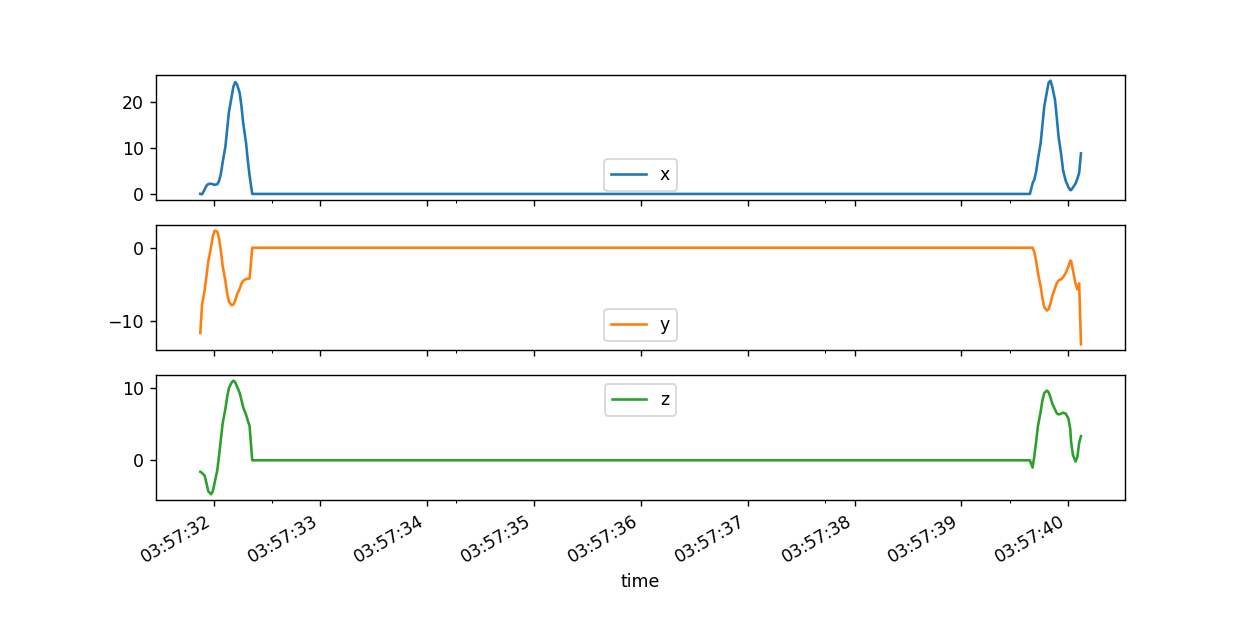

36.0

In [11]:
get_turns_smooth_jump_run(jump_run_right_forward_turn_right2)

#### cross over

<IPython.core.display.Javascript object>


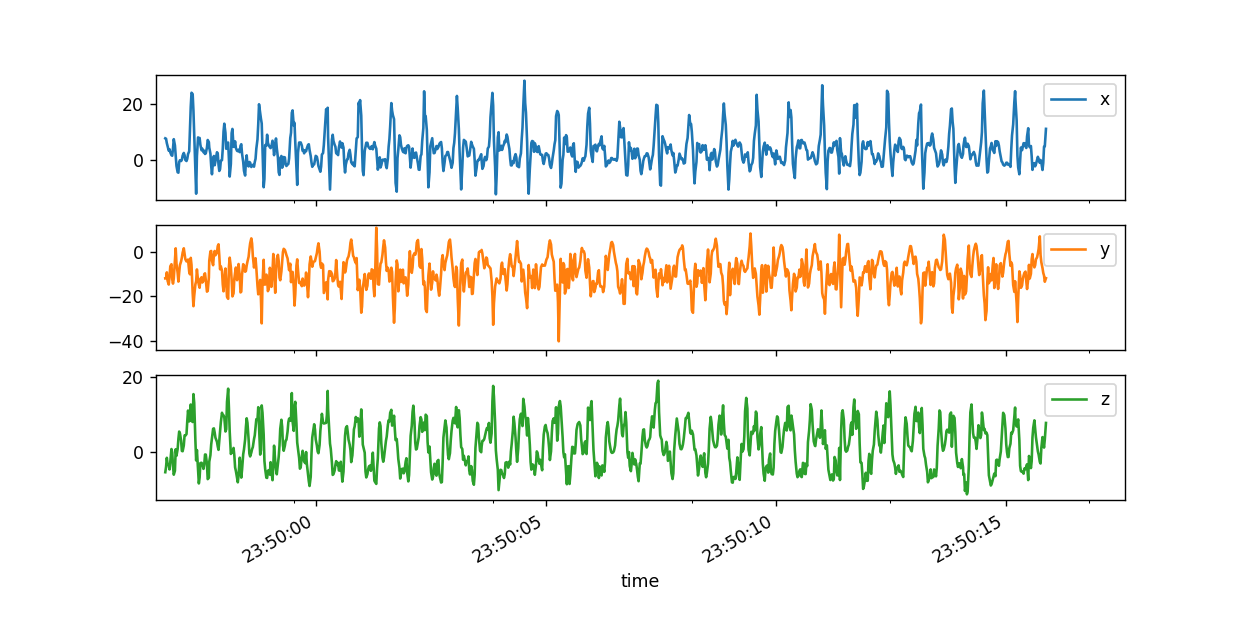

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A2918BAE88>,
      dtype=object)

In [11]:
cross_over7.plot(x='time', subplots=True)

In [12]:
#2 keer savgol filter uitvoeren met 41,3
def get_turns_smooth_cross_over(df):
    for i in range(0,2):
        df['x'] = savgol_filter(df[ 'x'].to_numpy(), 41, 3)
        df['y'] = savgol_filter(df[ 'y'].to_numpy(), 41, 3)
        df['z'] = savgol_filter(df[ 'z'].to_numpy(), 41, 3)
        df.plot(x='time', subplots=True)

    wx = find_peaks(df['x'])
    wy = find_peaks(df['y'])
    wz = find_peaks(df['z'])
    return (len(wx[0]) + len(wy[0]) + len(wz[0]))/3

<IPython.core.display.Javascript object>


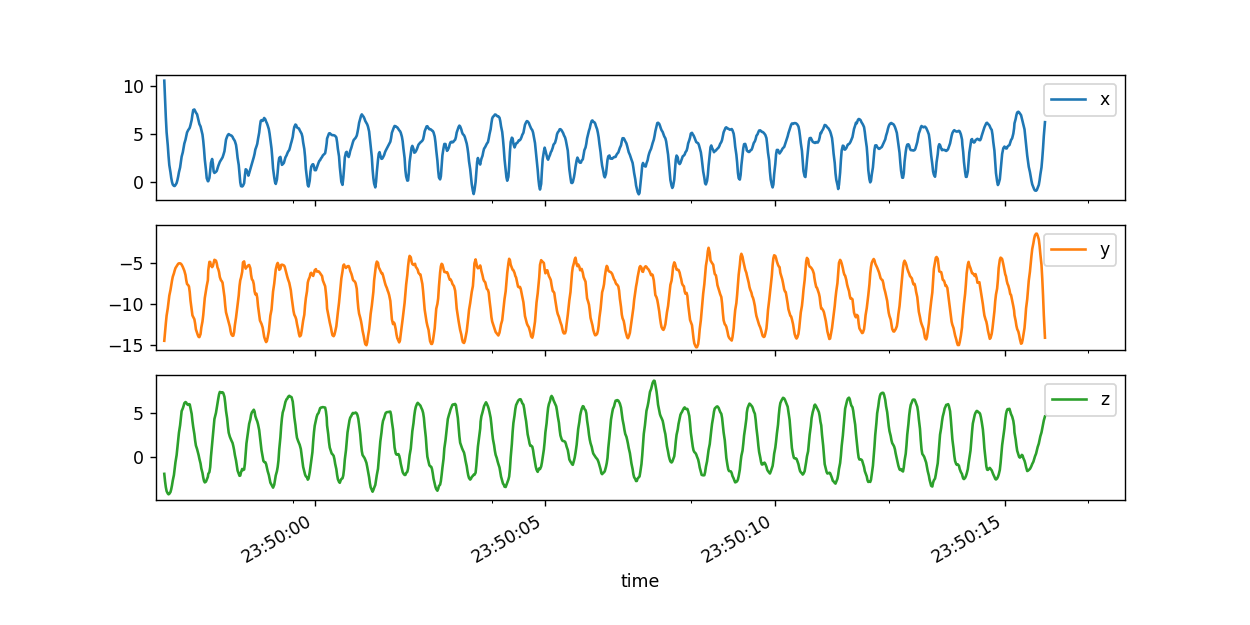

<IPython.core.display.Javascript object>


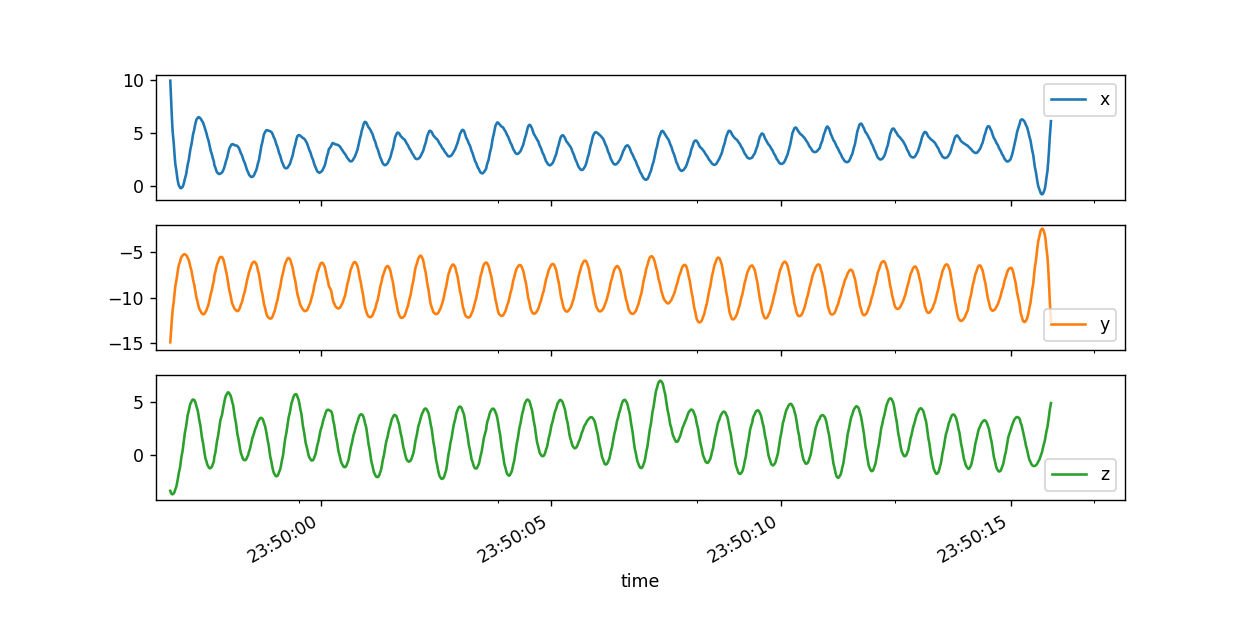

26.333333333333332

In [13]:
get_turns_smooth_cross_over(cross_over7)

##### side swing

In [243]:
side_swing5 = pd.read_csv(r"..\data\side_swing\proefpersoon1\side_swing_left_forward_tim.csv", sep=';', header=0, skipinitialspace=True)
side_swing_rigth1 = pd.read_csv(r"..\data\side_swing\proefpersoon1\side_swing_right_forward_tim.csv", sep=';', header=0, skipinitialspace=True)
side_swing_left_backwards9 = pd.read_csv(r"..\data\side_swing\proefpersoon1\side_swing_left_backwards_tim.csv", sep=';', header=0, skipinitialspace=True)
side_swing_right_backwards8 = pd.read_csv(r"..\data\side_swing\proefpersoon1\side_swing_right_backwards_tim.csv", sep=';', header=0, skipinitialspace=True)


side_swing4 = pd.read_csv(r"..\data\side_swing\proefpersoon2\side_swing_left_forward.csv", sep=';', header=0, skipinitialspace=True)
side_swing_right_forward2 = pd.read_csv(r"..\data\side_swing\proefpersoon2\side_swing_right_forward(2).csv", sep=';', header=0, skipinitialspace=True)
side_swing_left_backwards2 = pd.read_csv(r"..\data\side_swing\proefpersoon2\side_swing_left_backwards.csv", sep=';', header=0, skipinitialspace=True)
side_swing_right_backwards4 = pd.read_csv(r"..\data\side_swing\proefpersoon2\side_swing_right_backwards.csv", sep=';', header=0, skipinitialspace=True)

side_swing5 = preprocess(side_swing5, "jump_fast", 20,10)
side_swing_rigth1 = preprocess(side_swing_rigth1, "jump_fast", 20,10)
side_swing_left_backwards9 = preprocess(side_swing_left_backwards9, "jump_fast", 20,10)
side_swing_right_backwards8 = preprocess(side_swing_right_backwards8, "jump_fast", 20,10)

side_swing4 = preprocess(side_swing4, "jump_fast", 20,30)
side_swing_right_forward2 = preprocess(side_swing_right_forward2, "jump_fast", 40,30)
side_swing_left_backwards2 = preprocess(side_swing_left_backwards2, "jump_fast", 60,60)
side_swing_right_backwards4 = preprocess(side_swing_right_backwards4, "jump_fast", 30,30)

<IPython.core.display.Javascript object>


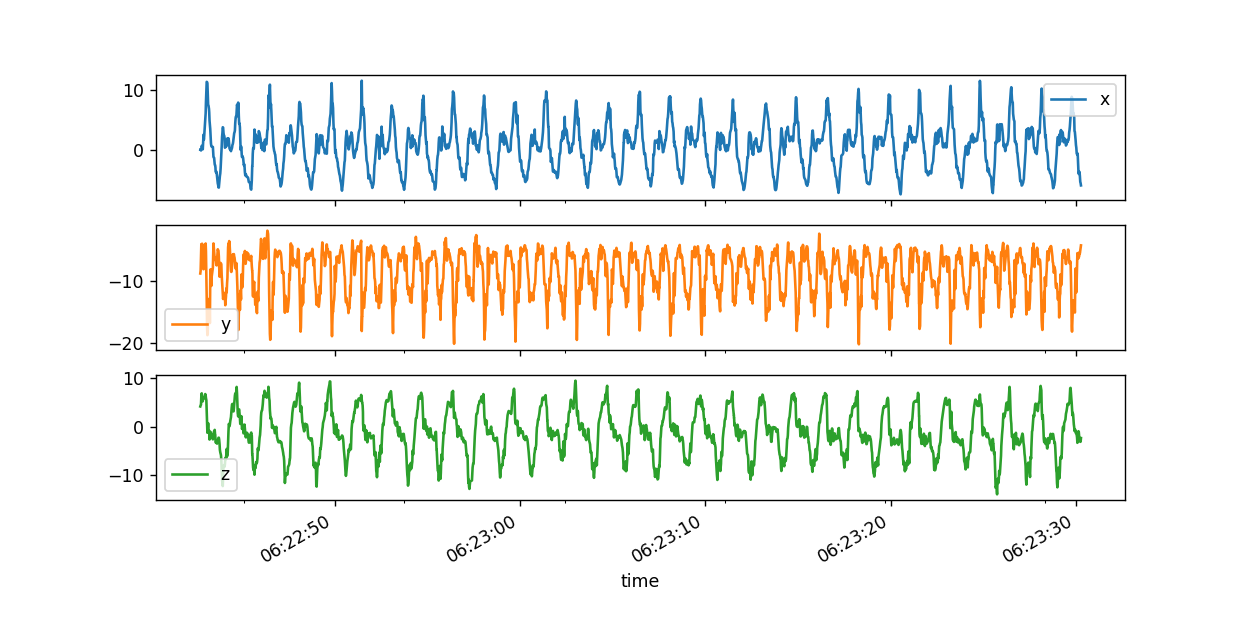

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002189F40FD88>,
      dtype=object)

In [244]:
side_swing_right_backwards4.plot(x='time', subplots=True)

In [225]:
#3 keer savgol filter uitvoeren met 33,5
def get_turns_smooth_side_swing(df):
    for i in range(0,2):
        df['z'] = savgol_filter(df[ 'z'].to_numpy(), 151, 5)
        df.plot(x='time', subplots=True)

    wz = find_peaks(df['z'])
    return len(wz[0])

<IPython.core.display.Javascript object>


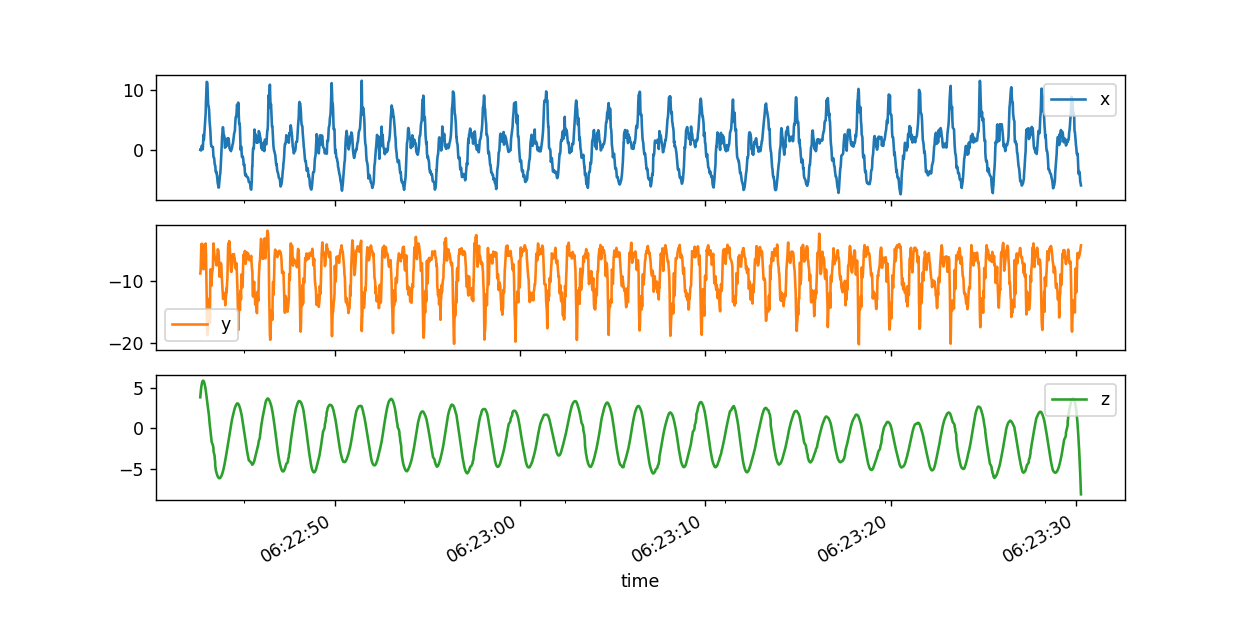

<IPython.core.display.Javascript object>


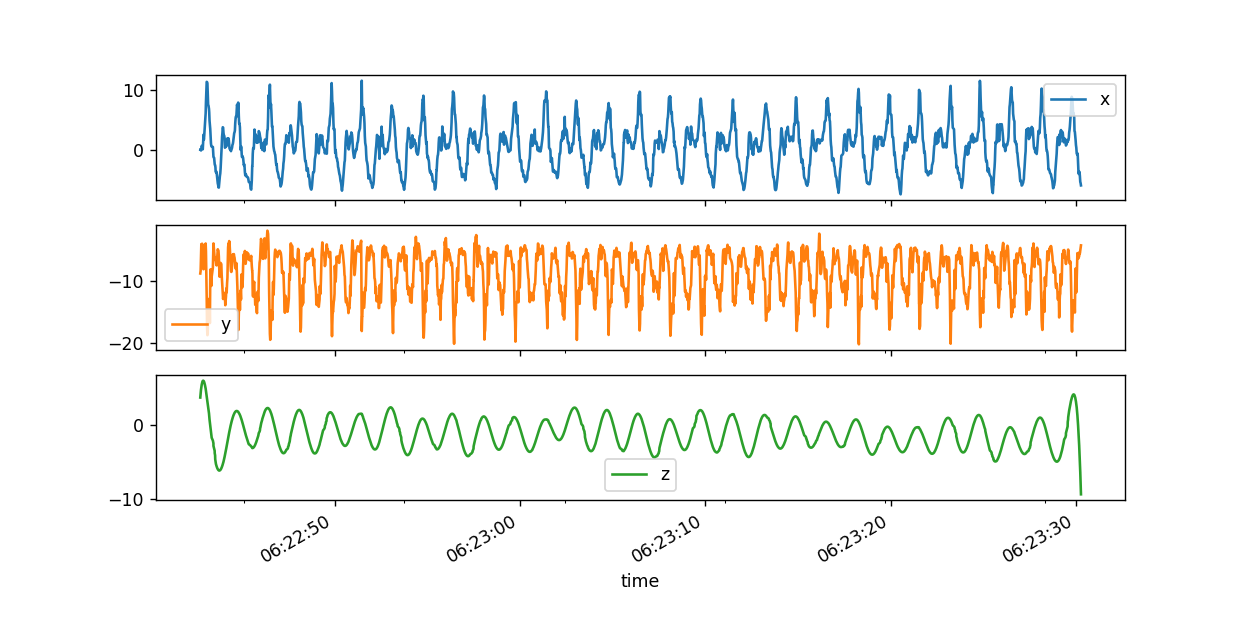

29

In [245]:
get_turns_smooth_side_swing(side_swing_right_backwards4)

##### jump fast

In [191]:
jump_fast_left_forward2 = pd.read_csv(r"..\data\jump_fast\proefpersoon1\jump_fast_left_forward_tim1.csv", sep=';', header=0, skipinitialspace=True)
jump_fast_right2 = pd.read_csv(r"..\data\jump_fast\proefpersoon1\jump_fast_right_forward_tim.csv", sep=';', header=0, skipinitialspace=True)
jump_fast_left_backwards5 = pd.read_csv(r"..\data\jump_fast\proefpersoon1\jump_fast_left_backwards_tim(1).csv", sep=';', header=0, skipinitialspace=True)
jump_fast_right_backwards4 = pd.read_csv(r"..\data\jump_fast\proefpersoon1\jump_fast_right_backwards_tim(1).csv", sep=';', header=0, skipinitialspace=True)

jump_fast3 = pd.read_csv(r"..\data\jump_fast\proefpersoon2\jump_fast_left_forward1.csv", sep=';', header=0, skipinitialspace=True)
jump_fast_right_forward3 = pd.read_csv(r"..\data\jump_fast\proefpersoon2\jump_fast_right_forward1(2).csv", sep=';', header=0, skipinitialspace=True)
jump_fast_left_backwards2 = pd.read_csv(r"..\data\jump_fast\proefpersoon2\jump_fast_left_backwards1.csv", sep=';', header=0, skipinitialspace=True)
jump_fast_right_backwards3 = pd.read_csv(r"..\data\jump_fast\proefpersoon2\jump_fast_right_backwards1(2).csv", sep=';', header=0, skipinitialspace=True)


jump_fast_left_forward2 = preprocess(jump_fast_left_forward2, "jump_fast", 20,10)
jump_fast_right2 = preprocess(jump_fast_right2, "jump_fast", 20,10)
jump_fast_left_backwards5 = preprocess(jump_fast_left_backwards5, "jump_fast", 5,5)
jump_fast_right_backwards4 = preprocess(jump_fast_right_backwards4, "jump_fast", 10,20)


jump_fast3 = preprocess(jump_fast3, "jump_fast", 10,20)
jump_fast_right_forward3 = preprocess(jump_fast_right_forward3, "jump_fast", 10,20)
jump_fast_left_backwards2 = preprocess(jump_fast_left_backwards2, "jump_fast", 10,20)
jump_fast_right_backwards3 = preprocess(jump_fast_right_backwards3, "jump_fast", 20,20)

<IPython.core.display.Javascript object>


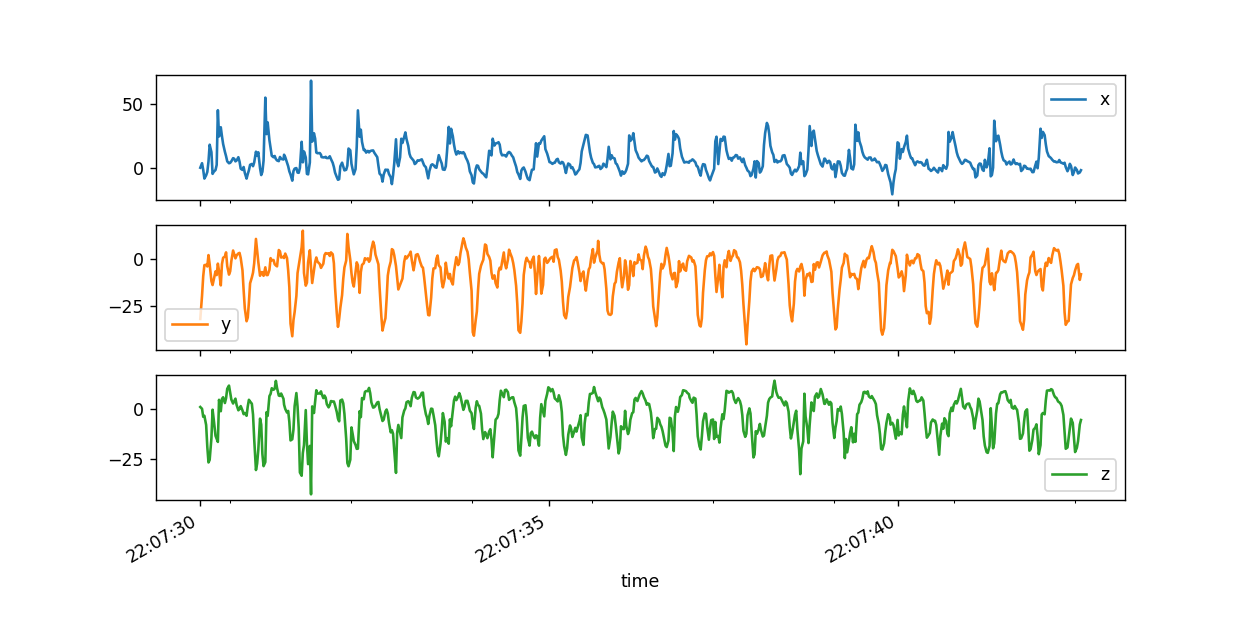

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002188D211588>,
      dtype=object)

In [192]:
jump_fast_right_backwards4.plot(x='time', subplots=True)

In [193]:
#5 keer savgol filter uitvoeren met 33,5
def get_turns_smooth_fast(df):
    for i in range(0,1):
        df['x'] = savgol_filter(df[ 'x'].to_numpy(), 199, 7)
        df['y'] = savgol_filter(df[ 'y'].to_numpy(), 199, 7)
        df['z'] = savgol_filter(df[ 'z'].to_numpy(), 199, 7)
        df.plot(x='time', subplots=True)

    wx = find_peaks(df['x'])
    wy = find_peaks(df['y'])
    wz = find_peaks(df['z'])
    return (len(wx[0]) + len(wy[0]) + len(wz[0]))/3

<IPython.core.display.Javascript object>


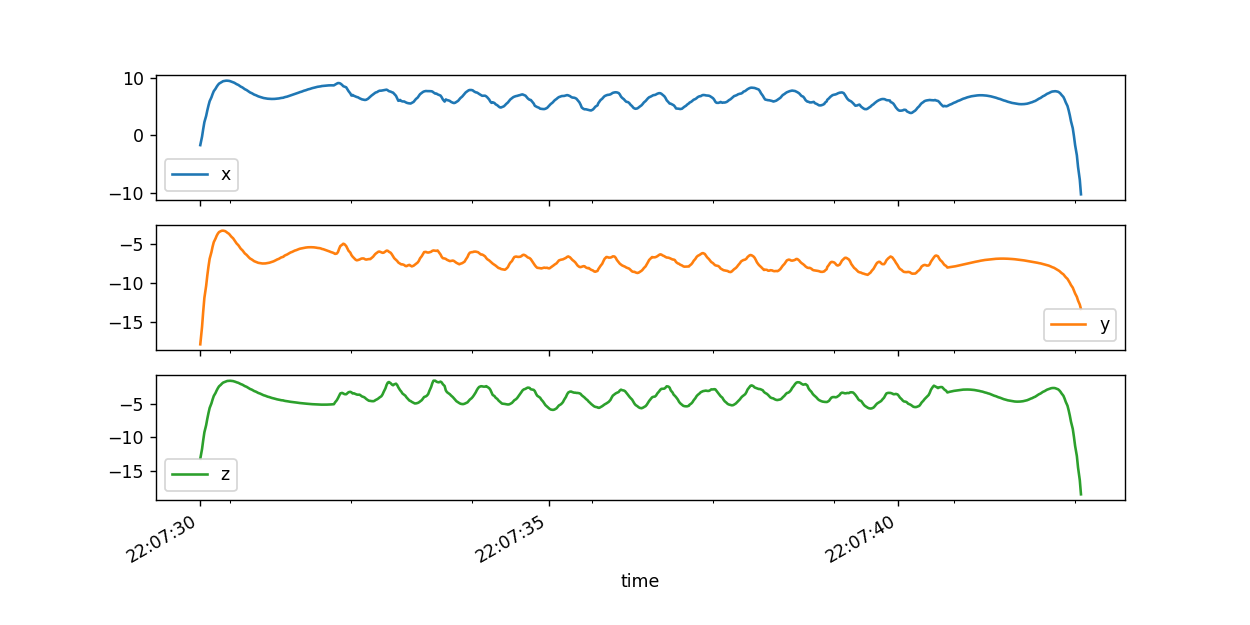

36.0

In [194]:
get_turns_smooth_fast(jump_fast_right_backwards4)

##### jump slow

In [85]:
jump_slow_rigth2 = pd.read_csv(r"..\data\jump_slow\proefpersoon1\jump_slow_right_forward_tim.csv", sep=';', header=0, skipinitialspace=True)
jump_slow_left_backwards4 = pd.read_csv(r"..\data\jump_slow\proefpersoon1\jump_slow_left_backwards_tim1(2).csv", sep=';', header=0, skipinitialspace=True)
jump_slow_right_backwards4 = pd.read_csv(r"..\data\jump_slow\proefpersoon1\jump_slow_right_backwards_tim1(2).csv", sep=';', header=0, skipinitialspace=True)

jump_slow4 = pd.read_csv(r"..\data\jump_slow\proefpersoon2\jump_slow_left_forward1.csv", sep=';', header=0, skipinitialspace=True)
jump_slow_rigth5 = pd.read_csv(r"..\data\jump_slow\proefpersoon2\jump_slow_right_forward1.csv", sep=';', header=0, skipinitialspace=True)
jump_slow_turn_diff2 = pd.read_csv(r"..\data\jump_slow\proefpersoon2\jump_slow_left_backwards.csv", sep=';', header=0, skipinitialspace=True)
jump_slow_right_backwards3 = pd.read_csv(r"..\data\jump_slow\proefpersoon2\jump_slow_right_backwards1(2).csv", sep=';', header=0, skipinitialspace=True)


jump_slow_rigth2 = preprocess(jump_slow_rigth2, "jump_fast", 20,20)
jump_slow_left_backwards4 = preprocess(jump_slow_left_backwards4, "jump_fast", 20,20)
jump_slow_right_backwards4 = preprocess(jump_slow_right_backwards4, "jump_fast", 10,10)

jump_slow4 = preprocess(jump_slow4, "jump_fast", 10,10)
jump_slow_rigth5 = preprocess(jump_slow_rigth5, "jump_fast", 20,20)
jump_slow_turn_diff2 = preprocess(jump_slow_turn_diff2, "jump_fast", 20,20)
jump_slow_right_backwards3 = preprocess(jump_slow_right_backwards3, "jump_fast", 20,20)

<IPython.core.display.Javascript object>


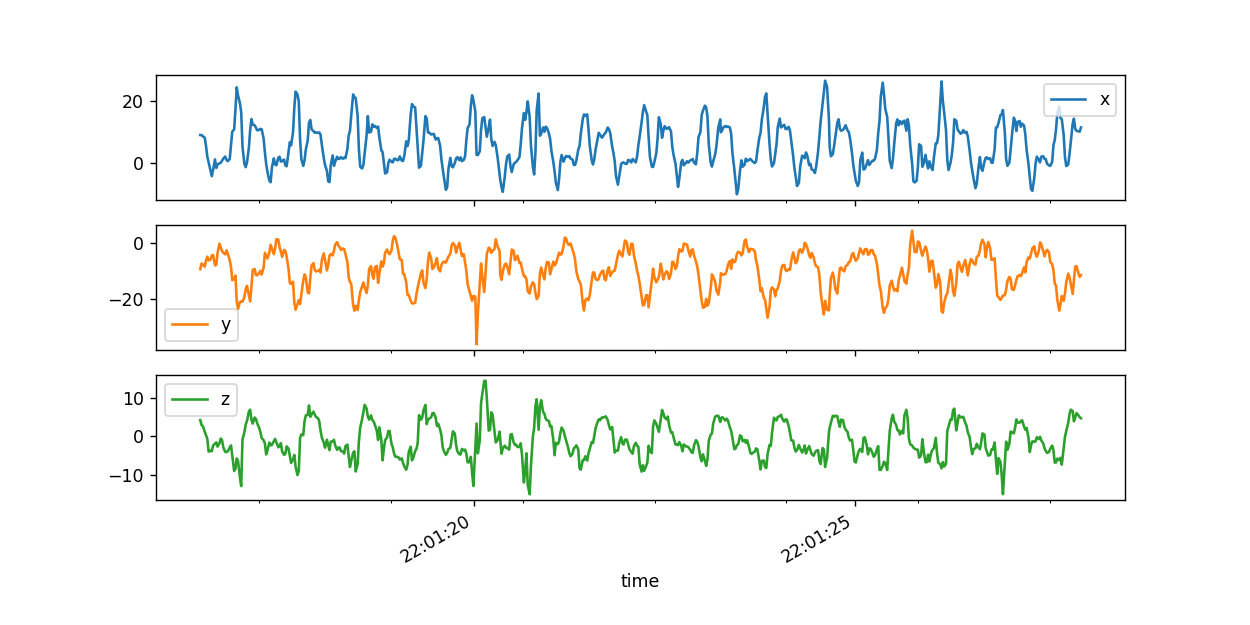

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000218FD78B808>,
      dtype=object)

In [86]:
jump_slow_right_backwards3.plot(x='time', subplots=True)

In [87]:
#3 keer savgol filter uitvoeren met 51,3
def get_turns_smooth(df):
    for i in range(0,3):
        df['x'] = savgol_filter(df[ 'x'].to_numpy(), 51, 3)
        df['y'] = savgol_filter(df[ 'y'].to_numpy(), 51, 3)
        df['z'] = savgol_filter(df[ 'z'].to_numpy(), 51, 3)
        df.plot(x='time', subplots=True)

    wx = len(find_peaks(df['x'])[0])
    wy = len(find_peaks(df['y'])[0])
    wz = len(find_peaks(df['z'])[0])
          
    return (wx + wy + wz)/3

<IPython.core.display.Javascript object>


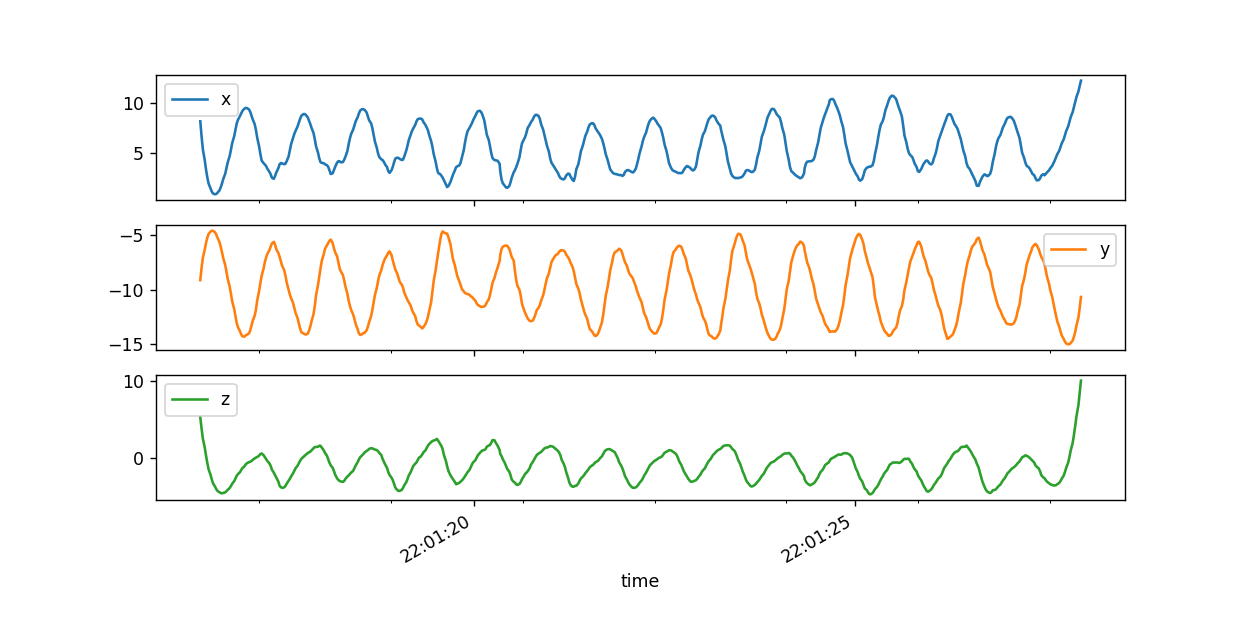

<IPython.core.display.Javascript object>


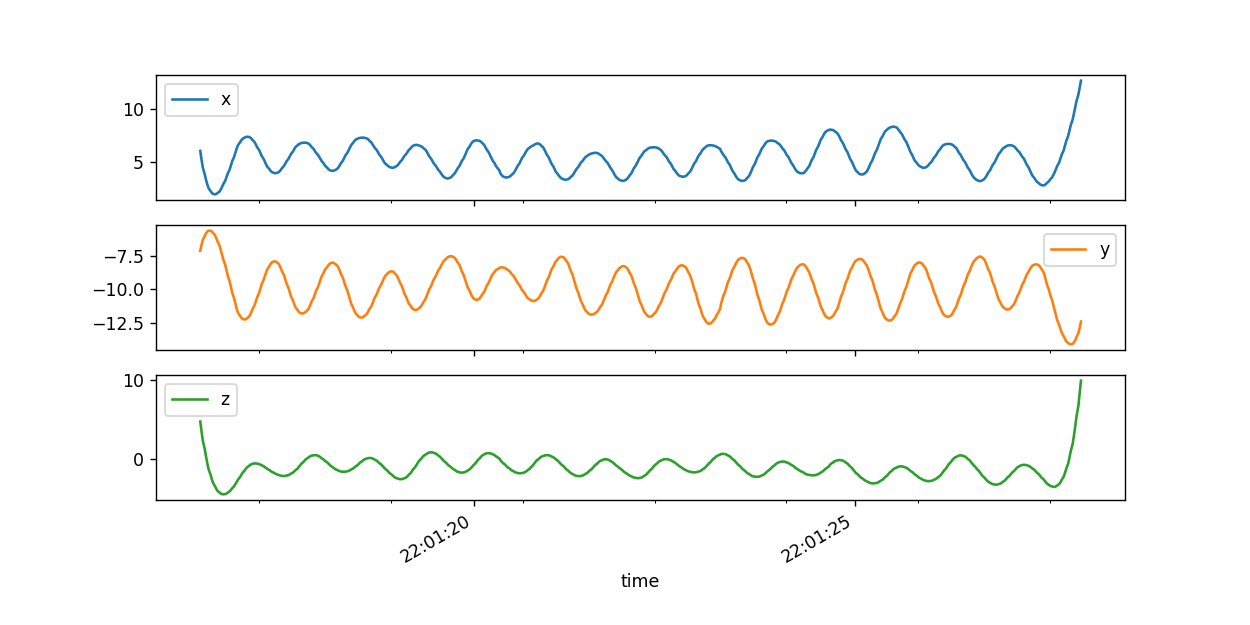

<IPython.core.display.Javascript object>


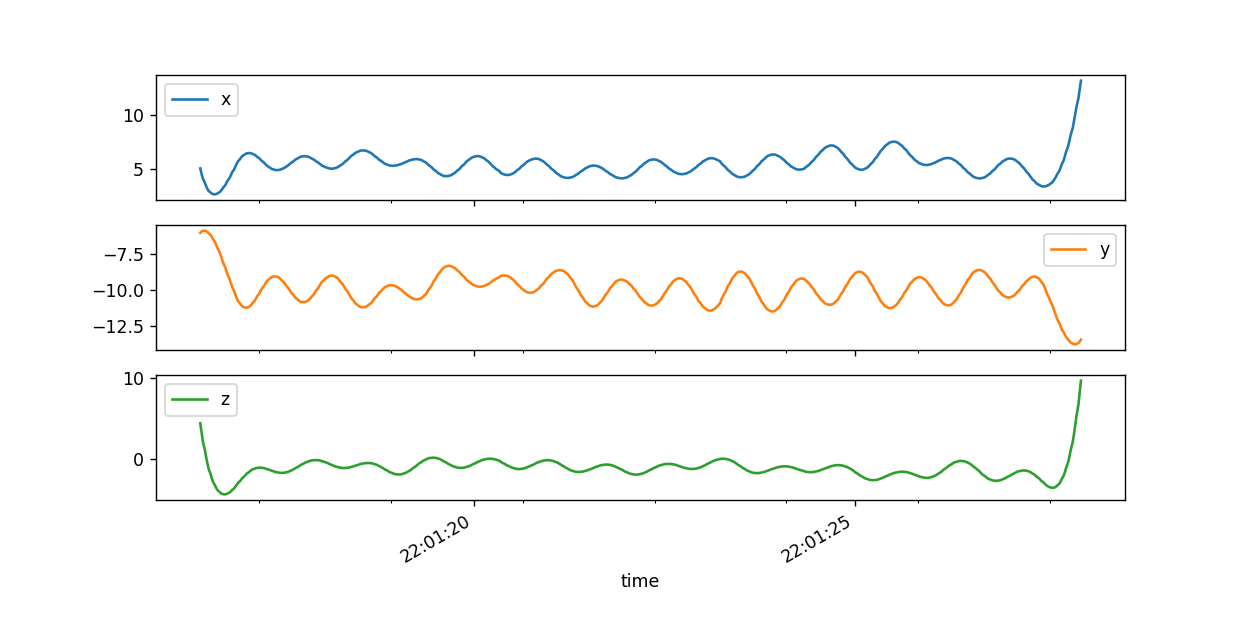

14.333333333333334

In [88]:
get_turns_smooth(jump_slow_right_backwards3)

<IPython.core.display.Javascript object>


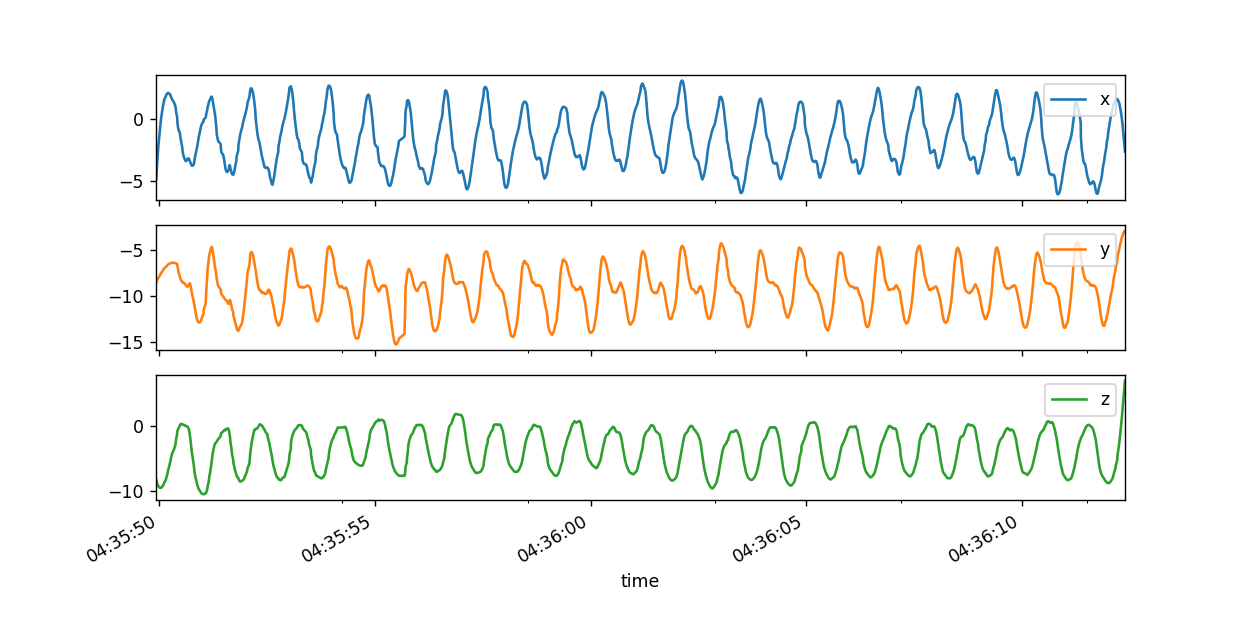

<IPython.core.display.Javascript object>


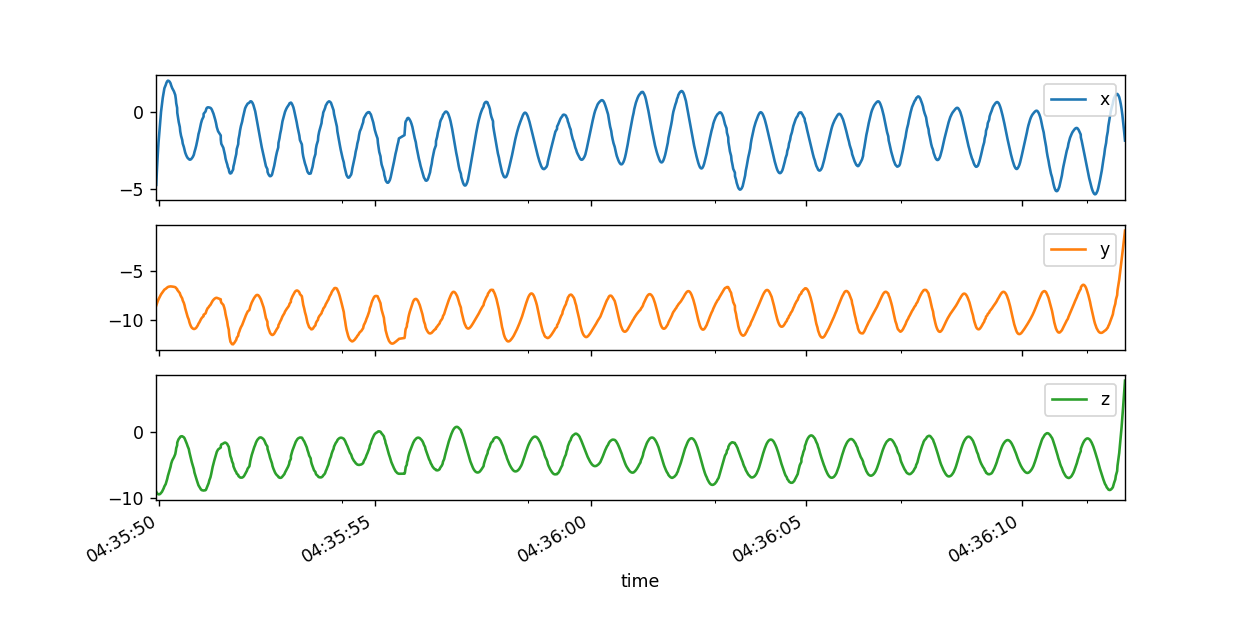

<IPython.core.display.Javascript object>


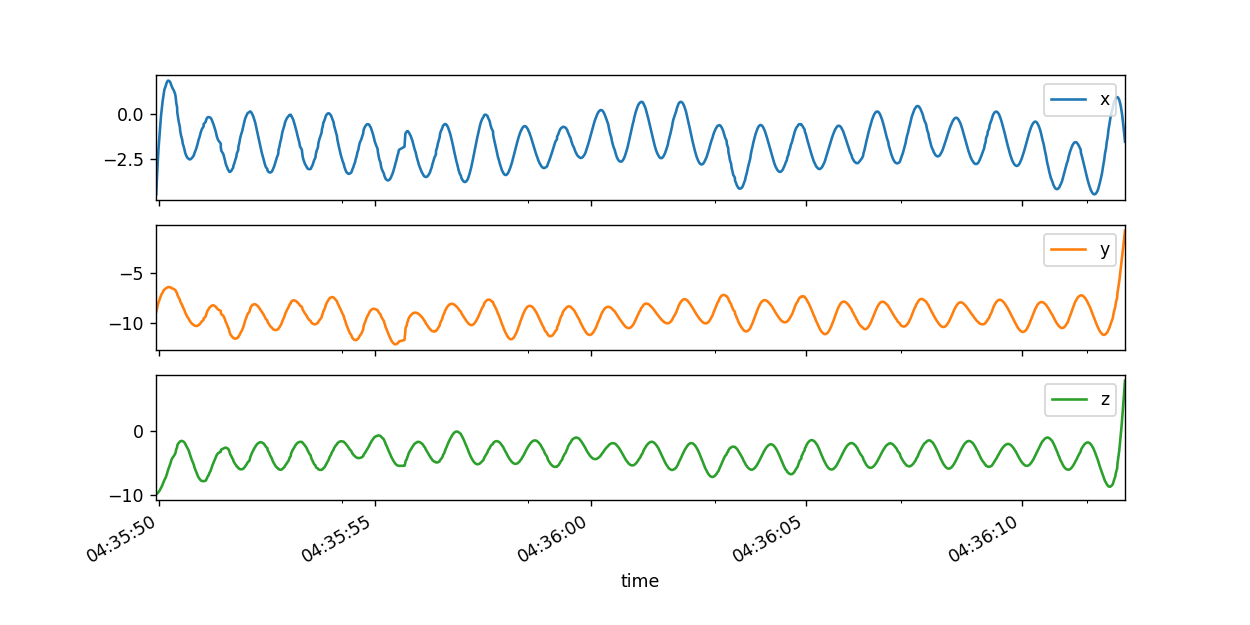

24.333333333333332

In [134]:
get_turns_smooth(jump_slow2)

<IPython.core.display.Javascript object>


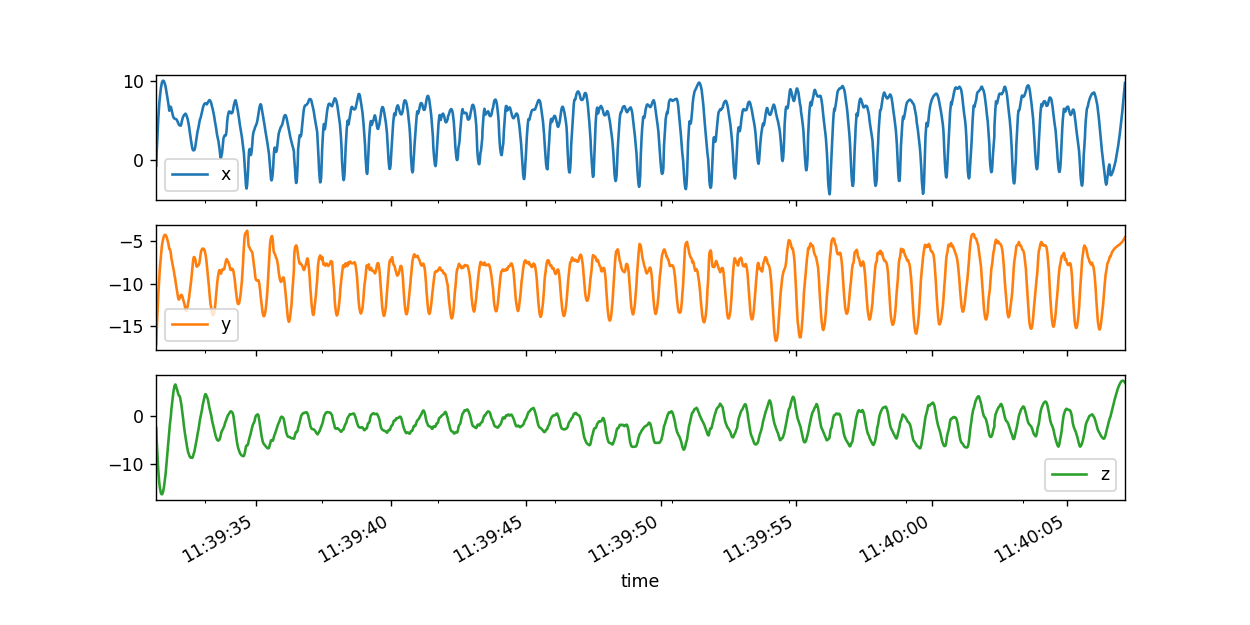

<IPython.core.display.Javascript object>


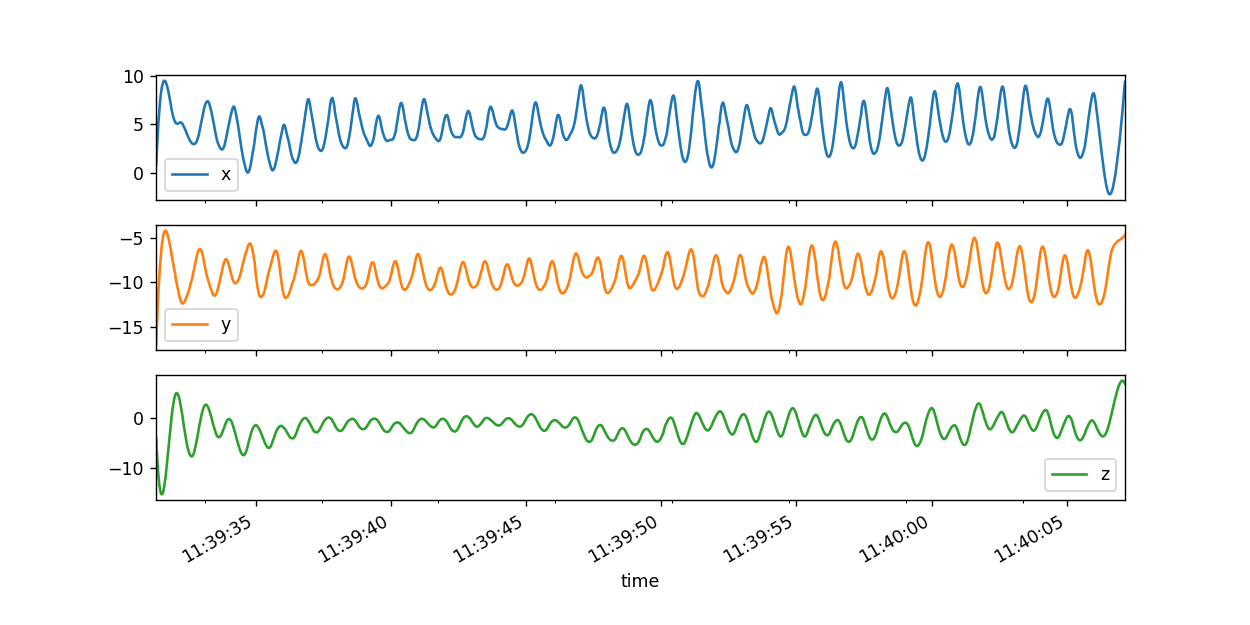

<IPython.core.display.Javascript object>


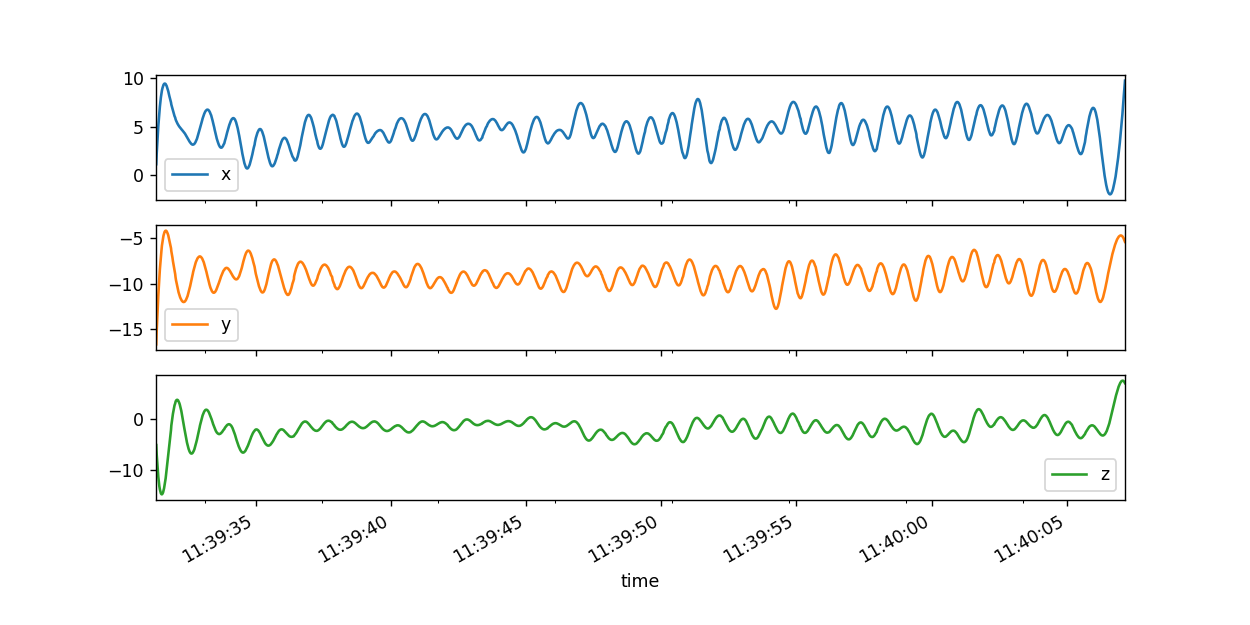

40.666666666666664

In [135]:
get_turns_smooth(jump_slow_rigth)

### threshold + selfconvolution

In [ ]:


def get_number_of_turns_threshold(df, col, percentage):
    duration = df['time'].iloc[-1] - df['time'].iloc[0] 
    local_min = pd.DataFrame()
    local_min = df[(df[col].shift(1) > df[col]) & (df[col].shift(-1) > df[col])][['time', col]].reset_index()
    
    min_local_min = local_min[col].min()
    max_local_min = local_min[col].max()
    delta_local_min = max_local_min - min_local_min
    threshold_up =  min_local_min + (percentage * delta_local_min)
    local_min = local_min[(local_min[col] < threshold_up) & (local_min[col] > min_local_min)]
    
    local_min['deltaT'] = local_min.time - local_min.time.shift(1)
    return duration/(local_min['deltaT'].mean())

def get_number_of_turns_fft(df, col):
    w = np.fft.fft(df[col])
    print (np.absolute(w))
    
def get_number_of_turns_peaks(df, col):
    w = find_peaks(df[col])
    print(w)

    
fft = np.fft.rfft(jump_mixed["x"], norm="ortho")

def abs2(x):
    return x.real**2 + x.imag**2

selfconvol=np.fft.irfft(abs2(fft), norm="ortho")

selfconvol

### autocorrelation

In [ ]:
#autocorrelation

ax = pd.plotting.autocorrelation_plot(jump_fast["x"])
ax.figure

In [ ]:
#scipy corelate
corr = correlate(jump_fast["x"], jump_fast["x"], mode="same")
plt.plot(corr)

In [ ]:
'''
for i in range(1,10):
    period = jump_fast["x"].iloc[0:i]
    plt.plot(correlate(period, jump_fast["x"]))'''
period = jump_fast["x"].iloc[10:11]
print(find_peaks(correlate(period, jump_fast["x"]),  height = 200)[0].size)
plt.figure()
plt.plot(correlate(period, jump_fast["x"]))

### quantile

In [24]:
jump_slow.describe()

x            y            z
count  1773.000000  1773.000000  1773.000000
mean     -5.058928    -8.366434    -5.121723
std       6.509570     6.159407     6.663776
min     -25.507490   -25.562525   -20.764915
25%      -8.532805   -11.727223   -10.370493
50%      -3.524628    -8.188239    -5.209175
75%      -0.423530    -3.902694     0.457029
max       9.126225     5.161318    12.571890

3.1135407999999996


<IPython.core.display.Javascript object>


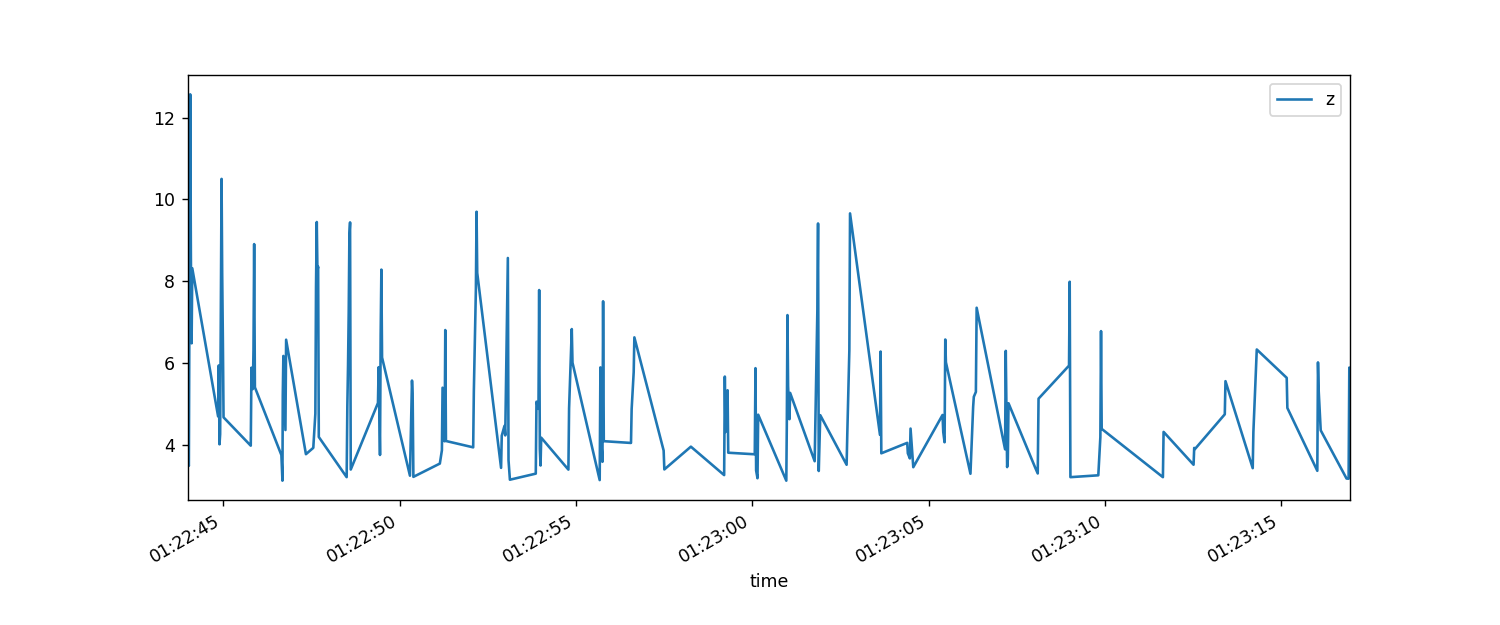

In [30]:
quantile = jump_slow.quantile(0.9)
print(quantile['z'])
vw1 = jump_slow['x'] > quantile['x']
vw2 = jump_slow['y'] > quantile['y']
vw3 = jump_slow['z'] > quantile['z']
jump_slow[vw3][['time', 'z']].plot(x='time')

<IPython.core.display.Javascript object>


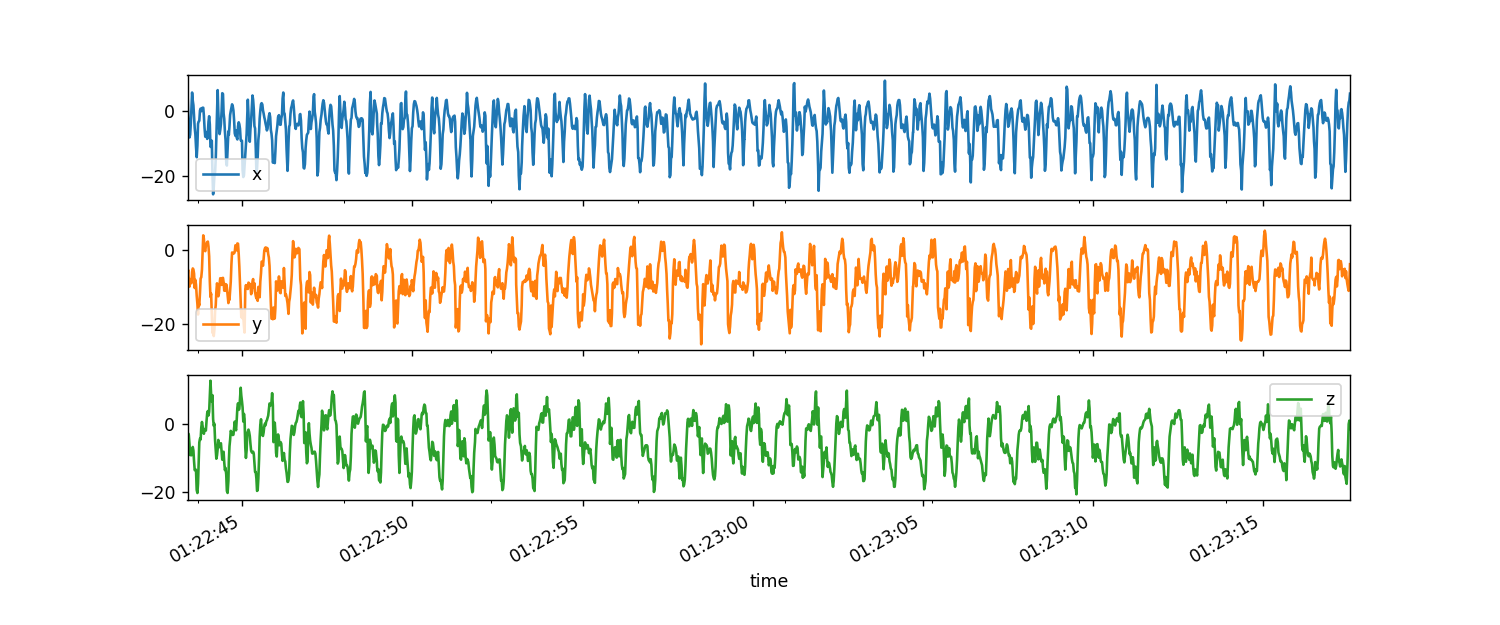

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BE8FA31288>,
      dtype=object)

In [31]:
jump_slow.plot(x='time', subplots=True)

# mistakes

In [251]:
mistakes = pd.read_csv(r"..\data\mistake_tim1.csv", sep=';', header=0, skipinitialspace=True)
mistakes2 = pd.read_csv(r"..\data\mistake_tim2.csv", sep=';', header=0, skipinitialspace=True)
mistakes3 = pd.read_csv(r"..\data\mistake_tim3.csv", sep=';', header=0, skipinitialspace=True)
mistakes4 = pd.read_csv(r"..\data\mistake_tim4.csv", sep=';', header=0, skipinitialspace=True)
mistakes5 = pd.read_csv(r"..\data\mistake_tim5.csv", sep=';', header=0, skipinitialspace=True)
mistakes6 = pd.read_csv(r"..\data\mistake_tim6.csv", sep=';', header=0, skipinitialspace=True)

<IPython.core.display.Javascript object>


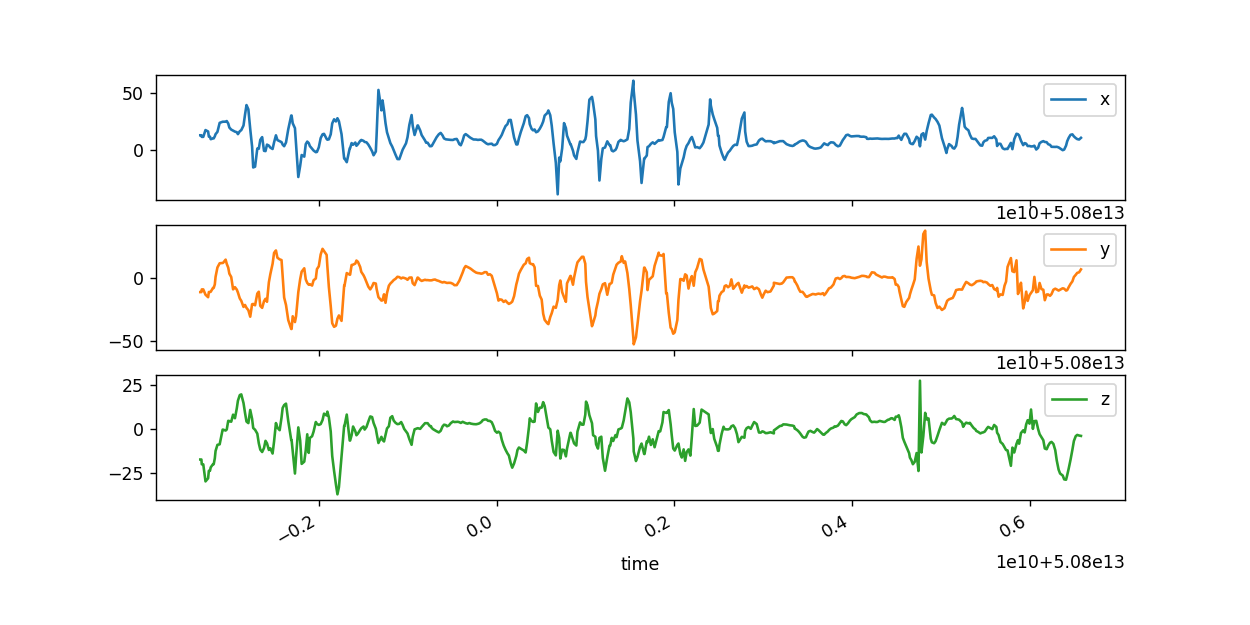

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000218A376F988>,
      dtype=object)

In [252]:
mistakes2.plot(x='time', subplots=True)

<IPython.core.display.Javascript object>


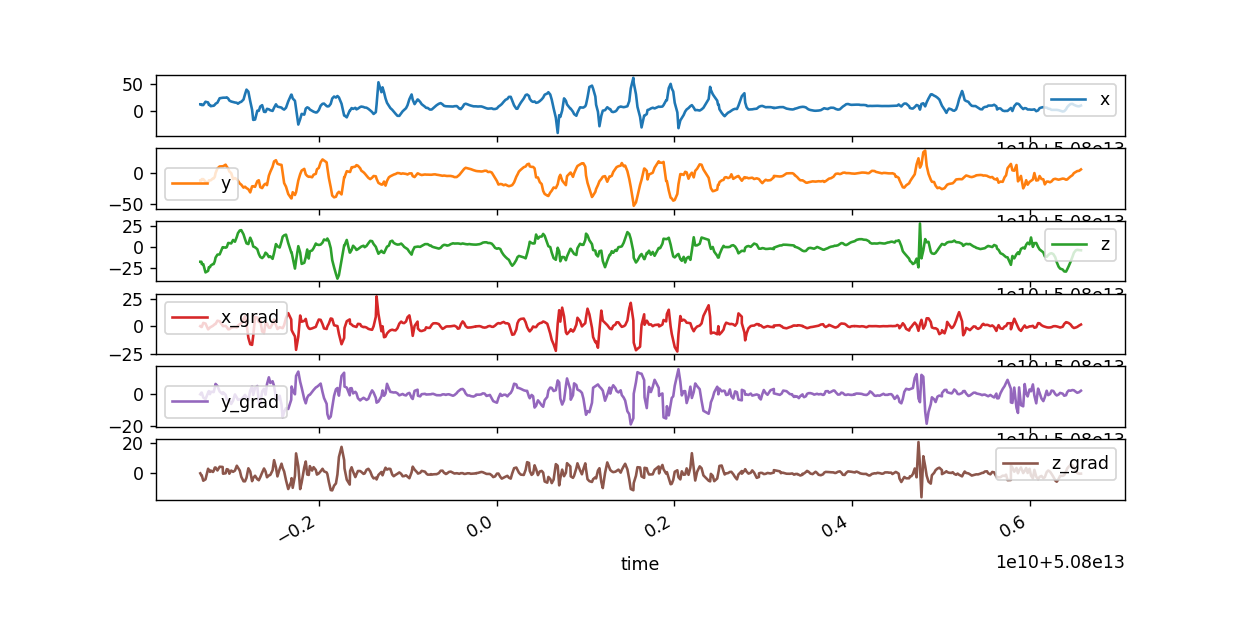

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000218A44AF348>,
      dtype=object)

In [253]:
gradient = pd.DataFrame(mistakes2)
gradient['x_grad'] = np.gradient(mistakes2['x'].to_numpy())
gradient['y_grad'] = np.gradient(mistakes2['y'].to_numpy())
gradient['z_grad'] = np.gradient(mistakes2['z'].to_numpy())
gradient.plot(x='time', subplots=True)

In [2]:
mistakes = pd.read_csv(r"..\data\mistakeev1.csv", sep=';', header=0, skipinitialspace=True)
mistakes2 = pd.read_csv(r"..\data\mistakeev2.csv", sep=';', header=0, skipinitialspace=True)

<IPython.core.display.Javascript object>


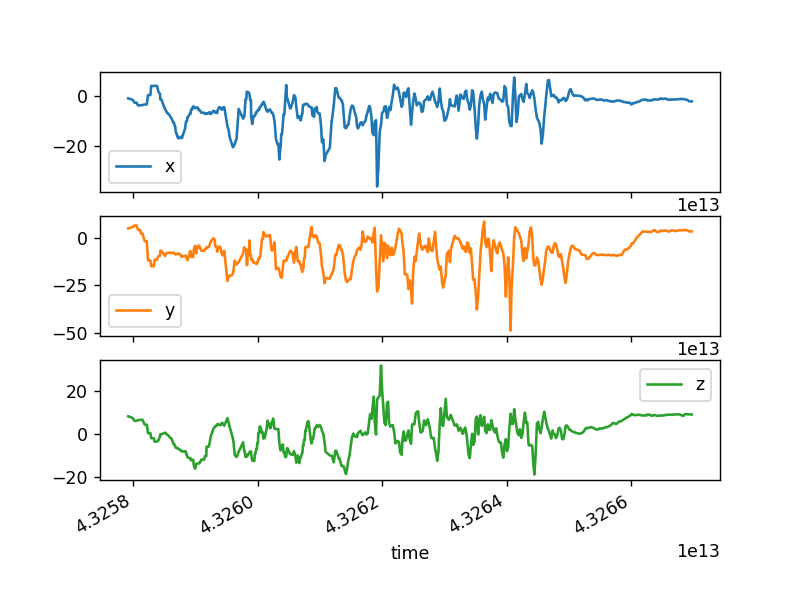

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002C517EEC548>,
      dtype=object)

In [5]:
mistakes.plot(x='time', subplots=True)

In [173]:
mistakeev1
mistakes = preprocess(mistakes, "mistake", 0, 0)
mistakes2 = preprocess(mistakes2, "mistake", 0, 0)

mistakes

time         x         y         z activity
0    1970-01-01 01:50:52.108775424  1.555335  0.780060  9.214760  mistake
1    1970-01-01 01:50:52.122406912  1.555335  0.780060  9.214760  mistake
2    1970-01-01 01:50:52.152815616  1.555335  0.780060  9.214760  mistake
3    1970-01-01 01:50:52.170379264  1.438086  0.947558  9.272188  mistake
4    1970-01-01 01:50:52.171952128  1.438086  0.947558  9.272188  mistake
...                            ...       ...       ...       ...      ...
3397 1970-01-01 01:51:48.646420480  1.091127  3.290131  9.080762  mistake
3398 1970-01-01 01:51:48.646944768  1.091127  3.290131  9.080762  mistake
3399 1970-01-01 01:51:48.647206912  1.091127  3.290131  9.080762  mistake
3400 1970-01-01 01:51:48.673421312  1.091127  3.290131  9.080762  mistake
3401 1970-01-01 01:51:48.673945600  1.091127  3.290131  9.080762  mistake

[3402 rows x 5 columns]

<IPython.core.display.Javascript object>


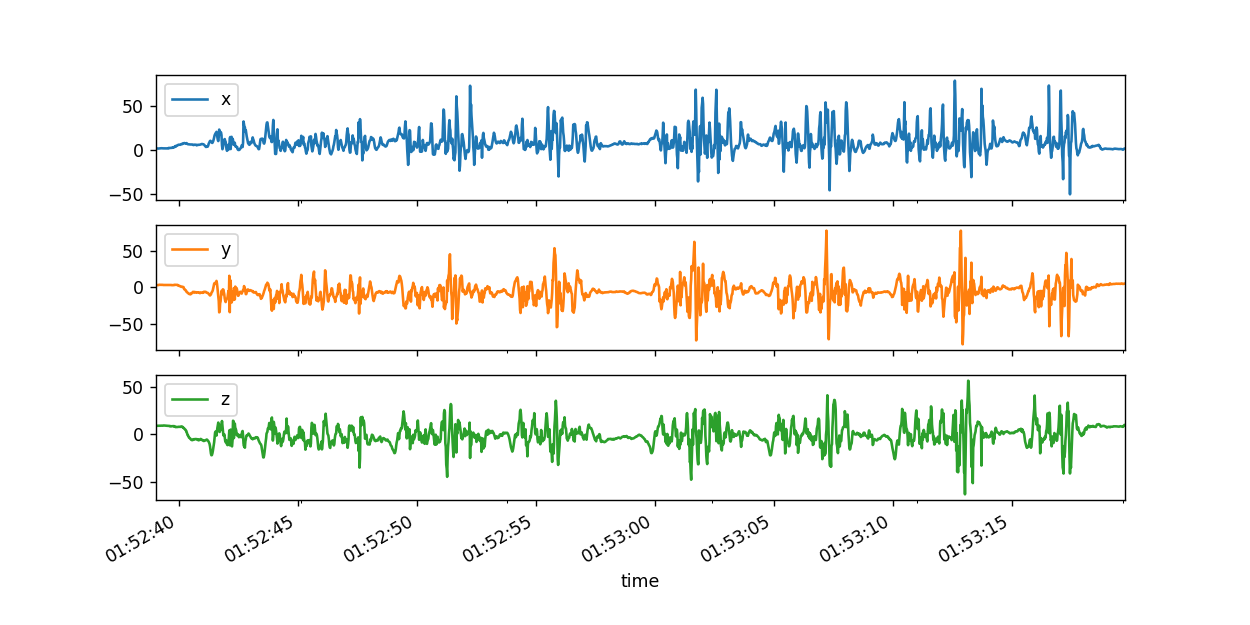

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B5518E1C8>,
      dtype=object)

In [174]:
mistakes2.plot(x='time', subplots=True)

<IPython.core.display.Javascript object>


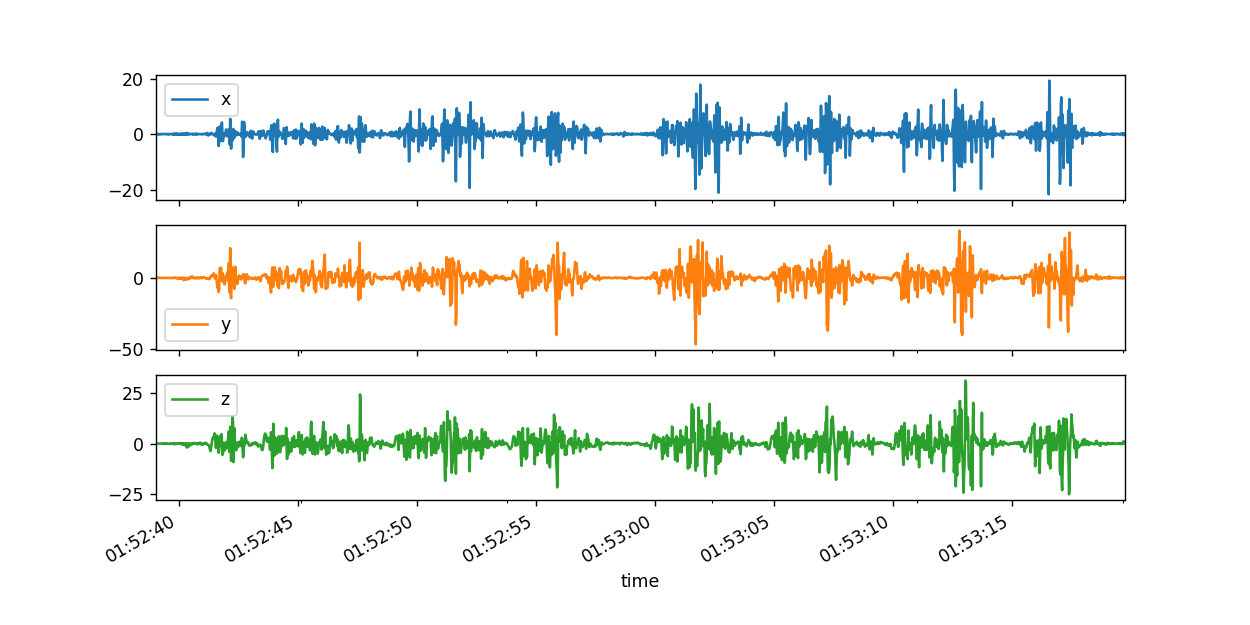

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B5A53B848>,
      dtype=object)

In [179]:
gradient = pd.DataFrame(mistakes2)
gradient['x'] = np.gradient(mistakes2['x'].to_numpy())
gradient['y'] = np.gradient(mistakes2['y'].to_numpy())
gradient['z'] = np.gradient(mistakes2['z'].to_numpy())

In [189]:
vw1 = (gradient['x'] > -0.1) & (gradient['x'] < 0.1) 
vw2 = (gradient['y'] > -0.1) & (gradient['y'] < 0.1) 
vw3 = (gradient['z'] > -0.1) & (gradient['z'] < 0.1) 
mistakes_cut = gradient[vw1 & vw2 & vw3].iloc[0:30]
mistakes_cut

time         x         y         z activity
0  1970-01-01 01:52:39.029186560  0.000000  0.000000  0.000000  mistake
1  1970-01-01 01:52:39.032070144  0.000000  0.000000  0.000000  mistake
2  1970-01-01 01:52:39.043604480  0.000000  0.000000  0.000000  mistake
3  1970-01-01 01:52:39.043866624 -0.022732  0.000000  0.000000  mistake
4  1970-01-01 01:52:39.044390912 -0.022732  0.000000  0.000000  mistake
5  1970-01-01 01:52:39.059857408  0.045464 -0.032303  0.045464  mistake
6  1970-01-01 01:52:39.095771136  0.045464 -0.032303  0.045464  mistake
7  1970-01-01 01:52:39.103373312 -0.022732  0.000000  0.000000  mistake
8  1970-01-01 01:52:39.108616192 -0.022732  0.000000  0.000000  mistake
9  1970-01-01 01:52:39.111761920  0.025125  0.000000  0.000000  mistake
10 1970-01-01 01:52:39.113859072  0.025125  0.000000  0.000000  mistake
13 1970-01-01 01:52:39.168122880  0.025125  0.000000  0.000000  mistake
14 1970-01-01 01:52:39.169171456  0.025125  0.000000  0.000000  mistake
15 1970-01-01 01:52:39.172055040  0.023629  0.000000  0.000000  mistake
16 1970-01-01 01:52:39.181230080  0.023629  0.000000  0.000000  mistake
17 1970-01-01 01:52:39.183851520 -0.047258 -0.017946  0.038285  mistake
18 1970-01-01 01:52:39.217930240 -0.047258 -0.017946  0.038285  mistake
19 1970-01-01 01:52:39.229464576  0.023629  0.000000  0.000000  mistake
20 1970-01-01 01:52:39.232086016  0.023629  0.000000  0.000000  mistake
21 1970-01-01 01:52:39.237853184 -0.019741  0.000000  0.000000  mistake
22 1970-01-01 01:52:39.241261056 -0.019741  0.000000  0.000000  mistake
23 1970-01-01 01:52:39.247814656  0.039482 -0.032303 -0.019142  mistake
24 1970-01-01 01:52:39.298408448  0.040977 -0.032303 -0.019142  mistake
25 1970-01-01 01:52:39.305486336 -0.018245  0.000000  0.000000  mistake
26 1970-01-01 01:52:39.309418496 -0.022732 -0.084945  0.089730  mistake
27 1970-01-01 01:52:39.320428544 -0.002991 -0.084945  0.089730  mistake
28 1970-01-01 01:52:39.324360704  0.001495  0.000000  0.000000  mistake
29 1970-01-01 01:52:39.326195712  0.001495  0.000000  0.000000  mistake
30 1970-01-01 01:52:39.336681472  0.000000  0.000000  0.000000  mistake
31 1970-01-01 01:52:39.342448640  0.000000  0.000000  0.000000  mistake

In [195]:
#cut mistakes in interval
mistakes_cut_x = pd.DataFrame()
mistakes_cut_y = pd.DataFrame()
mistakes_cut_z = pd.DataFrame()

start_x = gradient['x'].iloc[0]
start_y = gradient['y'].iloc[0]
start_z = gradient['z'].iloc[0]

for index, row in gradient.iterrows():
    if (row['x'] == 0):
         if (gradient['x'].iloc[index-1] != 0): 
            start_x = row['time']
            
    if (row['y'] == 0):
         if (gradient['y'].iloc[index-1] != 0): 
            start_y = row['time']
            
    if (row['z'] == 0):
         if (gradient['z'].iloc[index-1] != 0): 
            start_z = row['time']
        
    if (row['x'] != 0):
        if (gradient['x'].iloc[index-1] == 0):
            end = gradient['time'].iloc[index-1] 
            mistakes_cut_x = mistakes_cut_x.append(pd.Series({"end_x": end, "start_x": start_x}), ignore_index=True)
            
    if (row['y'] != 0):
        if (gradient['y'].iloc[index-1] == 0):
            end = gradient['time'].iloc[index-1] 
            mistakes_cut_y = mistakes_cut_y.append(pd.Series({"end_y": end, "start_y": start_y}), ignore_index=True)
            
    if (row['z'] != 0):
        if (gradient['z'].iloc[index-1] == 0):
            end = gradient['time'].iloc[index-1] 
            mistakes_cut_z = mistakes_cut_z.append(pd.Series({"end_z": end, "start_z": start_z}), ignore_index=True)
            
print(mistakes_cut_x)
print(mistakes_cut_y)
print(mistakes_cut_z)

                          end_x                        start_x
0 1970-01-01 01:52:39.043604480                              0
1 1970-01-01 01:52:39.343759360  1970-01-01 01:52:39.336681472
2 1970-01-01 01:52:39.465918464  1970-01-01 01:52:39.464083456
3 1970-01-01 01:52:39.591223296  1970-01-01 01:52:39.576018944
4 1970-01-01 01:52:39.715217408  1970-01-01 01:52:39.708663808
5 1970-01-01 01:52:39.820075008  1970-01-01 01:52:39.815618560
6 1970-01-01 01:52:39.878533120  1970-01-01 01:52:39.878533120
7 1970-01-01 01:53:19.176540160  1970-01-01 01:53:19.174967296
                           end_y                        start_y
0  1970-01-01 01:52:39.044390912                              0
1  1970-01-01 01:52:39.113859072  1970-01-01 01:52:39.103373312
2  1970-01-01 01:52:39.181230080  1970-01-01 01:52:39.168122880
3  1970-01-01 01:52:39.241261056  1970-01-01 01:52:39.229464576
4  1970-01-01 01:52:39.305486336  1970-01-01 01:52:39.305486336
5  1970-01-01 01:52:39.357915136  1970-01-01 01:5

<IPython.core.display.Javascript object>


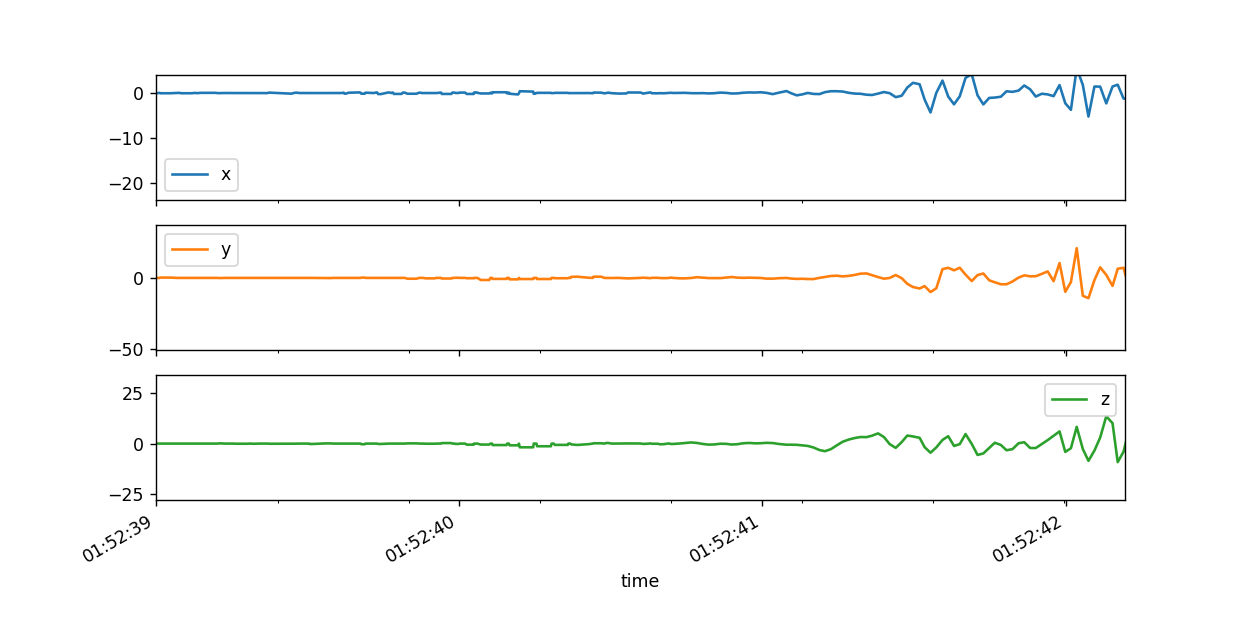

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B5A37E8C8>,
      dtype=object)

In [186]:
gradient.plot(x='time', subplots=True)